# Julie DANDRIMONT - Travail 2 - 20175838


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#crée le dataframe 
df = pd.read_csv('JulieDandrimont_données_psy3019-H23_20230204_Maltreatment_Types_of_Victims.csv')
df.head()
#df.tail()

,State,Medical Neglect Only,Neglect Only,Other Only,Physical Abuse Only,Psychological Maltreatment Only,Sexual Abuse Only,Sex Trafficking Only,Unknown Only,Multiple Maltreatment Types,...,Medical Neglect Only Percent,Neglect Only Percent,Other Only Percent,Physical Abuse Only Percent,Psychological Maltreatment Only Percent,Sexual Abuse Only Percent,Sex Trafficking Only Percent,Unknown Only Percent,Multiple Maltreatment Types Percent,Total Victims Percent
0,Alabama,49.0,3380,NaN,5114,16.0,1828.0,3.0,NaN,1287,...,0.4,28.9,NaN,43.8,0.1,15.7,0.0,NaN,11.0,100.0
1,Alaska,37.0,1445,NaN,111,327.0,183.0,1.0,NaN,955,...,1.2,47.2,NaN,3.6,10.7,6.0,0.0,NaN,31.2,100.0
2,Arizona,NaN,11332,NaN,682,1.0,389.0,NaN,NaN,443,...,NaN,88.2,NaN,5.3,0.0,3.0,NaN,NaN,3.4,100.0
3,Arkansas,1279.0,3421,1.0,1286,25.0,1415.0,NaN,NaN,995,...,15.2,40.6,0.0,15.3,0.3,16.8,NaN,NaN,11.8,100.0
4,California,NaN,50799,117.0,2161,2115.0,2264.0,NaN,NaN,6659,...,NaN,79.2,0.2,3.4,3.3,3.5,NaN,NaN,10.4,100.0


## Gestion des données manquantes

Le dataframe semble avoir des données manquantes et des colonnes pour l'instant inexploitables. 
Nous allons tout d'abord sélectionnner la partie d'intéret du Dataframe et investiguer le nombre de données manquantes. 
Notre stratégie ici a été de regouper les colonnes qui avaient le plus de NA, à savoir Other Only et Unknown Only - nommée Unoroth. 

Nous allons d'abord remplacer les NA par 0 et calculer les pourcentages cumulés des catégories. Dans le cas où ces pourcentages cumulés n'étaient pas égals à 100, nous avions pour but de recalculer la colonne Unoroth adéquatement. 

*valeurs manquantes cherchées (2%) /opérateurs d’agrégation présents (1%)*

In [3]:
#mets le nom des colonnes dans une liste
colonnes = df.columns.tolist()
print(colonnes)


# sélectionne la partie d'intéret du DataFrame
df_num = df.iloc[:,:colonnes.index('Medical Neglect Only Percent')]
df_num


['State', 'Medical Neglect Only', 'Neglect Only', 'Other Only', 'Physical Abuse Only', 'Psychological Maltreatment Only', 'Sexual Abuse Only', 'Sex Trafficking Only', 'Unknown Only', 'Multiple Maltreatment Types', 'Total Victims', 'Medical Neglect Only Percent', 'Neglect Only Percent', 'Other Only Percent', 'Physical Abuse Only Percent', 'Psychological Maltreatment Only Percent', 'Sexual Abuse Only Percent', 'Sex Trafficking Only Percent', 'Unknown Only Percent', 'Multiple Maltreatment Types Percent', 'Total Victims Percent']


,State,Medical Neglect Only,Neglect Only,Other Only,Physical Abuse Only,Psychological Maltreatment Only,Sexual Abuse Only,Sex Trafficking Only,Unknown Only,Multiple Maltreatment Types,Total Victims
0,Alabama,49.0,3380,NaN,5114,16.0,1828.0,3.0,NaN,1287,11677
1,Alaska,37.0,1445,NaN,111,327.0,183.0,1.0,NaN,955,3059
2,Arizona,NaN,11332,NaN,682,1.0,389.0,NaN,NaN,443,12847
3,Arkansas,1279.0,3421,1.0,1286,25.0,1415.0,NaN,NaN,995,8422
4,California,NaN,50799,117.0,2161,2115.0,2264.0,NaN,NaN,6659,64115
5,Colorado,80.0,9517,NaN,854,126.0,990.0,NaN,9.0,670,12246
6,Connecticut,87.0,4709,NaN,172,599.0,181.0,NaN,NaN,2294,8042
7,Delaware,NaN,313,120.0,161,404.0,121.0,NaN,NaN,129,1248
8,District of Columbia,NaN,1492,NaN,175,NaN,45.0,14.0,NaN,131,1857
9,Florida,616.0,12893,8201.0,1742,156.0,2354.0,NaN,NaN,6953,32915


In [4]:
#permet de voir le nombre de données manquantes par colonnes
df_num.isna().sum()

State                               0
Medical Neglect Only               16
Neglect Only                        0
Other Only                         31
Physical Abuse Only                 0
Psychological Maltreatment Only     6
Sexual Abuse Only                   1
Sex Trafficking Only               31
Unknown Only                       49
Multiple Maltreatment Types         0
Total Victims                       0
dtype: int64

In [5]:
# crée une mouvelle colone qui compile Other only et Unknown only 

df_num = df_num.fillna(0)
df_num.insert(loc = (colonnes.index('Total Victims')),
          column = 'Unoroth',
          value = sum([df_num.iloc[:,colonnes.index('Other Only')],df_num.iloc[:,colonnes.index('Unknown Only')]]))
 

df_num = df_num.rename(columns = {'Other Only':'Other','Unknown Only':'Unknown', 'Sexual Abuse Only': 'SAbused','Sex Trafficking Only':'STrafficking', 'Total Victims' : 'TotalVictims'}).drop(columns = ['Other','Unknown'])
#df_num = df_num.drop(columns =['Other','Unknown'])




In [6]:
df_num.head()

,State,Medical Neglect Only,Neglect Only,Physical Abuse Only,Psychological Maltreatment Only,SAbused,STrafficking,Multiple Maltreatment Types,Unoroth,TotalVictims
0,Alabama,49.0,3380,5114,16.0,1828.0,3.0,1287,0.0,11677
1,Alaska,37.0,1445,111,327.0,183.0,1.0,955,0.0,3059
2,Arizona,0.0,11332,682,1.0,389.0,0.0,443,0.0,12847
3,Arkansas,1279.0,3421,1286,25.0,1415.0,0.0,995,1.0,8422
4,California,0.0,50799,2161,2115.0,2264.0,0.0,6659,117.0,64115


In [7]:
colonnes = df_num.columns.tolist()
df_num.max(), df_num.min()

(State                              Wyoming
 Medical Neglect Only                5614.0
 Neglect Only                        399992
 Physical Abuse Only                  67678
 Psychological Maltreatment Only    15672.0
 SAbused                            47205.0
 STrafficking                         439.0
 Multiple Maltreatment Types         101973
 Unoroth                            17670.0
 TotalVictims                        656243
 dtype: object,
 State                              Alabama
 Medical Neglect Only                   0.0
 Neglect Only                            13
 Physical Abuse Only                     13
 Psychological Maltreatment Only        0.0
 SAbused                                0.0
 STrafficking                           0.0
 Multiple Maltreatment Types             36
 Unoroth                                0.0
 TotalVictims                            52
 dtype: object)

## Recalcul des pourcentages

On veut recalculer les pourcentages à partir des données de df_count. Nous avons donc généré dans un premier temps une boucle for qui génère les nouvelles colonnes. Puis une boucle while qui nous permet de calculer les pourcentages cumulés


*boucle « for » utilisé (2 %)- /boucle « while » utilisé (2 %)/ opérateur de comparaison présent*


In [8]:
#permet de créer des nouvelles colonnes à partir du nom de celles existantes
for i in range(1,len(colonnes)-1):
    a = colonnes[i]
    df_num['Per%s'% a[:3]] = df_num['%s'% a] /df_num['TotalVictims']*100
df_num.head(10)



,State,Medical Neglect Only,Neglect Only,Physical Abuse Only,Psychological Maltreatment Only,SAbused,STrafficking,Multiple Maltreatment Types,Unoroth,TotalVictims,PerMed,PerNeg,PerPhy,PerPsy,PerSAb,PerSTr,PerMul,PerUno
0,Alabama,49.0,3380,5114,16.0,1828.0,3.0,1287,0.0,11677,0.419628,28.945791,43.795495,0.137021,15.654706,0.025692,11.021667,0.000000
1,Alaska,37.0,1445,111,327.0,183.0,1.0,955,0.0,3059,1.209546,47.237659,3.628637,10.689768,5.982347,0.032690,31.219353,0.000000
2,Arizona,0.0,11332,682,1.0,389.0,0.0,443,0.0,12847,0.000000,88.207364,5.308632,0.007784,3.027944,0.000000,3.448276,0.000000
3,Arkansas,1279.0,3421,1286,25.0,1415.0,0.0,995,1.0,8422,15.186417,40.619805,15.269532,0.296842,16.801235,0.000000,11.814296,0.011874
4,California,0.0,50799,2161,2115.0,2264.0,0.0,6659,117.0,64115,0.000000,79.231069,3.370506,3.298760,3.531155,0.000000,10.386025,0.182485
5,Colorado,80.0,9517,854,126.0,990.0,0.0,670,9.0,12246,0.653275,77.715172,6.973706,1.028907,8.084272,0.000000,5.471174,0.073493
6,Connecticut,87.0,4709,172,599.0,181.0,0.0,2294,0.0,8042,1.081820,58.555086,2.138771,7.448396,2.250684,0.000000,28.525242,0.000000
7,Delaware,0.0,313,161,404.0,121.0,0.0,129,120.0,1248,0.000000,25.080128,12.900641,32.371795,9.695513,0.000000,10.336538,9.615385
8,District of Columbia,0.0,1492,175,0.0,45.0,14.0,131,0.0,1857,0.000000,80.344642,9.423802,0.000000,2.423263,0.753904,7.054389,0.000000
9,Florida,616.0,12893,1742,156.0,2354.0,0.0,6953,8201.0,32915,1.871487,39.170591,5.292420,0.473948,7.151755,0.000000,21.124108,24.915692


In [9]:
'''
fait la même chose que: df_num['total'] = df_num.iloc[:,10:].sum(axis = 1)
ie calcule le pourcentage cumulé total dans la colonne 'PerTot', permet de vérifier s'il ya des erreurs dans les pourcentages
'''

#initialise les variables
row = 0
colonnes = df_num.columns

while row < 54 : 
    
    row += 1 #compteur pour l'itération
    
    somme = df_num.iloc[row-1,10:].sum() #calcule la somme de la ième rangée
    df_num.loc[row-1,'PerTot'] = round(somme) 
    


In [10]:
df_num

,State,Medical Neglect Only,Neglect Only,Physical Abuse Only,Psychological Maltreatment Only,SAbused,STrafficking,Multiple Maltreatment Types,Unoroth,TotalVictims,PerMed,PerNeg,PerPhy,PerPsy,PerSAb,PerSTr,PerMul,PerUno,PerTot
0,Alabama,49.0,3380,5114,16.0,1828.0,3.0,1287,0.0,11677,0.419628,28.945791,43.795495,0.137021,15.654706,0.025692,11.021667,0.000000,100.0
1,Alaska,37.0,1445,111,327.0,183.0,1.0,955,0.0,3059,1.209546,47.237659,3.628637,10.689768,5.982347,0.032690,31.219353,0.000000,100.0
2,Arizona,0.0,11332,682,1.0,389.0,0.0,443,0.0,12847,0.000000,88.207364,5.308632,0.007784,3.027944,0.000000,3.448276,0.000000,100.0
3,Arkansas,1279.0,3421,1286,25.0,1415.0,0.0,995,1.0,8422,15.186417,40.619805,15.269532,0.296842,16.801235,0.000000,11.814296,0.011874,100.0
4,California,0.0,50799,2161,2115.0,2264.0,0.0,6659,117.0,64115,0.000000,79.231069,3.370506,3.298760,3.531155,0.000000,10.386025,0.182485,100.0
5,Colorado,80.0,9517,854,126.0,990.0,0.0,670,9.0,12246,0.653275,77.715172,6.973706,1.028907,8.084272,0.000000,5.471174,0.073493,100.0
6,Connecticut,87.0,4709,172,599.0,181.0,0.0,2294,0.0,8042,1.081820,58.555086,2.138771,7.448396,2.250684,0.000000,28.525242,0.000000,100.0
7,Delaware,0.0,313,161,404.0,121.0,0.0,129,120.0,1248,0.000000,25.080128,12.900641,32.371795,9.695513,0.000000,10.336538,9.615385,100.0
8,District of Columbia,0.0,1492,175,0.0,45.0,14.0,131,0.0,1857,0.000000,80.344642,9.423802,0.000000,2.423263,0.753904,7.054389,0.000000,100.0
9,Florida,616.0,12893,1742,156.0,2354.0,0.0,6953,8201.0,32915,1.871487,39.170591,5.292420,0.473948,7.151755,0.000000,21.124108,24.915692,100.0


## Graphiques

On remarque que certains états qui ont un pourcentage d'abus sexuels sur mineurs supérieur à 20 présentent aussi un pourcentage de violence physiques supérieurs à 20 % de violences sur mineurs.
Puis on regarde la positions relative des ces Etats par rapport aux deux variables à l'aide d'un nuage de point. 
Enfin, par curiosité, on décide de regarder le nombre d'état par nombre de victimes

*condition « if » utilisée (2 %)- histogramme et nuage de points*


In [11]:
#regarde quelles états ont des pourcentages de violence physique et sexuelles > 20 % et les stockent dans une liste
SAbuse = df_num.loc[df_num['PerSAb']>20]['State'].to_list()
PhysAbuse = df_num.loc[df_num['PerPhy']>20]['State'].to_list()
SAbuse.pop(SAbuse.index('Reporting States')) 
PhysAbuse.pop(PhysAbuse.index('Reporting States'))

states =[]

for i in range(len(SAbuse)): 
    if SAbuse[i] in PhysAbuse:  #regarde la correspondance dans les deux listes
        states.append(SAbuse[i]) #donne à states les états quiconfirment ces deux conditions
    
print(states)

print(df_num.loc[df_num['PerSAb']>20]['State']) #33,38,43,46



['North Carolina', 'Pennsylvania', 'Tennessee', 'Vermont']
20            Maryland
25            Missouri
33      North Carolina
38        Pennsylvania
43           Tennessee
46             Vermont
53    Reporting States
Name: State, dtype: object


[['North Carolina' 28.119978575254418 21.33547580789145]
 ['Pennsylvania' 40.709985468133695 41.66493668258252]
 ['Tennessee' 47.37803022618927 21.898772694999494]
 ['Vermont' 54.406580493537014 38.42538190364277]] 28.119978575254418


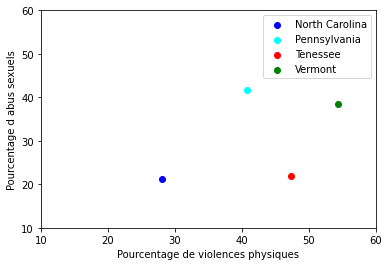

In [12]:
# On décide d'observer la position de ce
datag = (df_num.iloc[[33,38,43,46], [0,12,14]]).copy(deep=True).to_numpy()

print(datag,datag[0,1] )
f, ax = plt.subplots(1)

colors = ['blue','cyan','red','green']

ax1 = plt.scatter(datag[0,1],datag[0,2], c='blue', label = 'North Carolina') 
ax2 =  plt.scatter(datag[1,1],datag[1,2],c='cyan',label = 'Pennsylvania')
ax3 = plt.scatter(datag[2,1],datag[2,2], c='red',label = 'Tenessee')
ax4 = plt.scatter(datag[3,1],datag[3,2], c='green',label = 'Vermont')

ax.legend()
plt.xlim([10,60])
plt.xlabel('Pourcentage de violences physiques')
plt.ylim([10,60])

plt.ylabel('Pourcentage d abus sexuels')

plt.show()

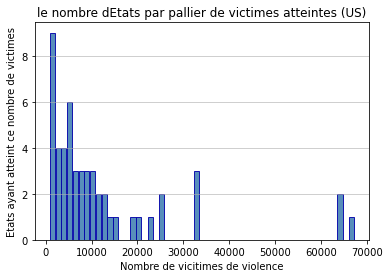

In [13]:
data1 =  df_num.iloc[:52, 9]#TotalVictims


plt.hist(data1, bins=53, alpha=0.9,rwidth=0.9, color='steelblue', edgecolor= '#0504aa')
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Nombre de vicitimes de violence')
plt.ylabel('Etats ayant atteint ce nombre de victimes')
plt.title('le nombre dEtats par pallier de victimes atteintes (US)')

plt.show()

### 